## Final Project Submission

Please fill out:
* Student name: Minna Fingerhood
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fangfang
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [ ]:
#how does date affect the price of houses?
#heatmap of lat/long at house prices?
#how does bathroom and square footage -- high correlation demonstrated by heatmap 

In [1]:
import warnings
warnings.filterwarnings("ignore")

assingment: 
    - You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

questions to keep in mind:

    -"how did you pick the question(s) that you did?"
    -"why are these questions important from a business perspective?"
    -"how did you decide on the data cleaning options you performed?"
    -"why did you choose a given method or library?"
    -"why did you select those visualizations and what did you learn from each of them?"
    -"why did you pick those features as predictors?"
    -"how would you interpret the results?"
    -"how confident are you in the predictive quality of the results?"
    -"what are some of the things that could cause the results to be wrong?"

In [2]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import sklearn as sk
%matplotlib inline
sns.set()


In [21]:
import functions as f

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#merge cristina datetime
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
5         5/12/2014
6         6/27/2014
7         1/15/2015
8         4/15/2015
9         3/12/2015
10         4/3/2015
11        5/27/2014
12        5/28/2014
13        10/7/2014
14        3/12/2015
15        1/24/2015
16        7/31/2014
17        5/29/2014
18        12/5/2014
19        4/24/2015
20        5/14/2014
21        8/26/2014
22         7/3/2014
23        5/16/2014
24       11/20/2014
25        11/3/2014
26        6/26/2014
27        12/1/2014
28        6/24/2014
29         3/2/2015
            ...    
21567     6/10/2014
21568     12/2/2014
21569     8/28/2014
21570    10/15/2014
21571      3/5/2015
21572    11/13/2014
21573     9/10/2014
21574     5/14/2014
21575     10/2/2014
21576     4/16/2015
21577     3/17/2015
21578    10/17/2014
21579    10/31/2014
21580     8/13/2014
21581     4/21/2015
21582    10/13/2014
21583     9/15/2014
21584    10/15/2014
21585      4/7/2015


In [10]:
#check & inspect duplicates id
df[df.id.duplicated(keep=False)]
#duplicates are a result of the same house being sold another time... Therefore do not need to delete 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [11]:
#deal with nulls in year renovated
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [12]:
df = f.clean_data(df)

In [13]:
#look at box plots to check cat data after cleaning

In [14]:
#look at distributions of data to see if transformations needed

normalize features with log transforms

In [15]:
c = ['price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
df = f.log_transform(df, c)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f3e5198>,
      dtype=object)

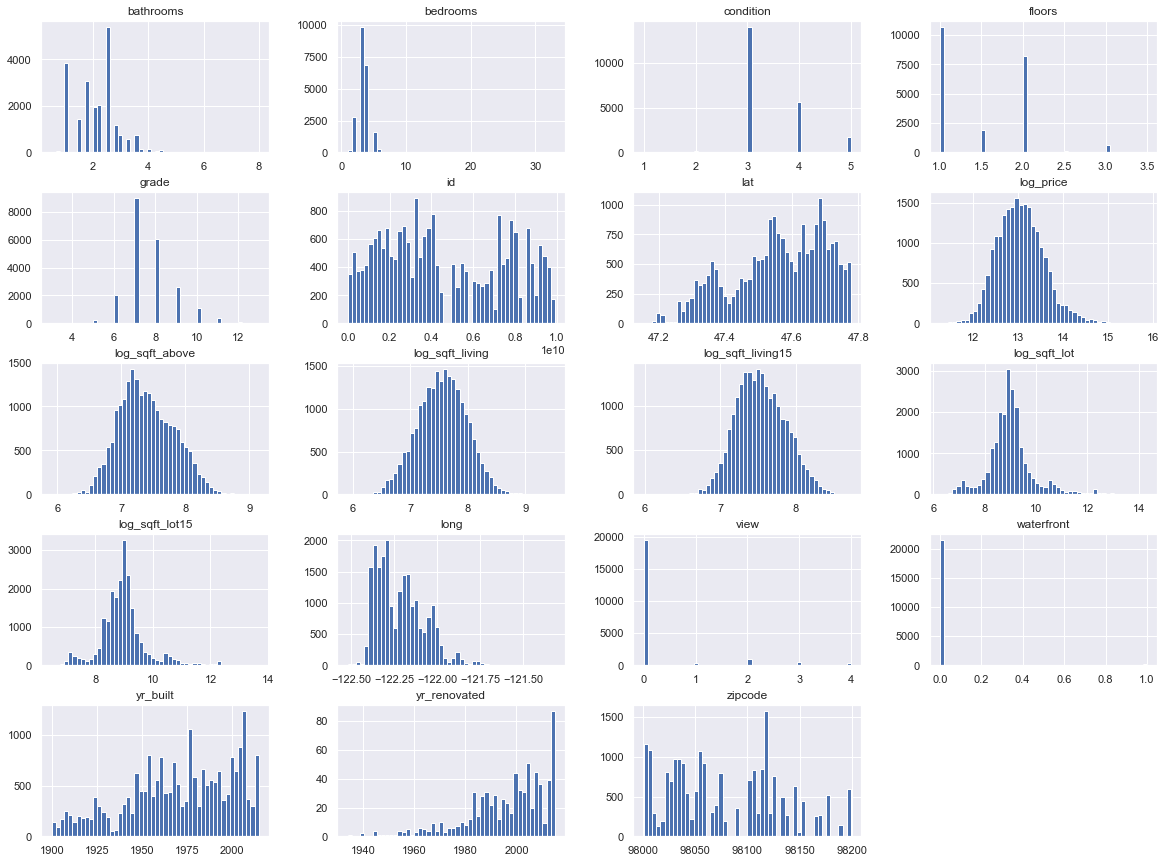

In [16]:
df.hist(bins=50, figsize=(20,15))


0

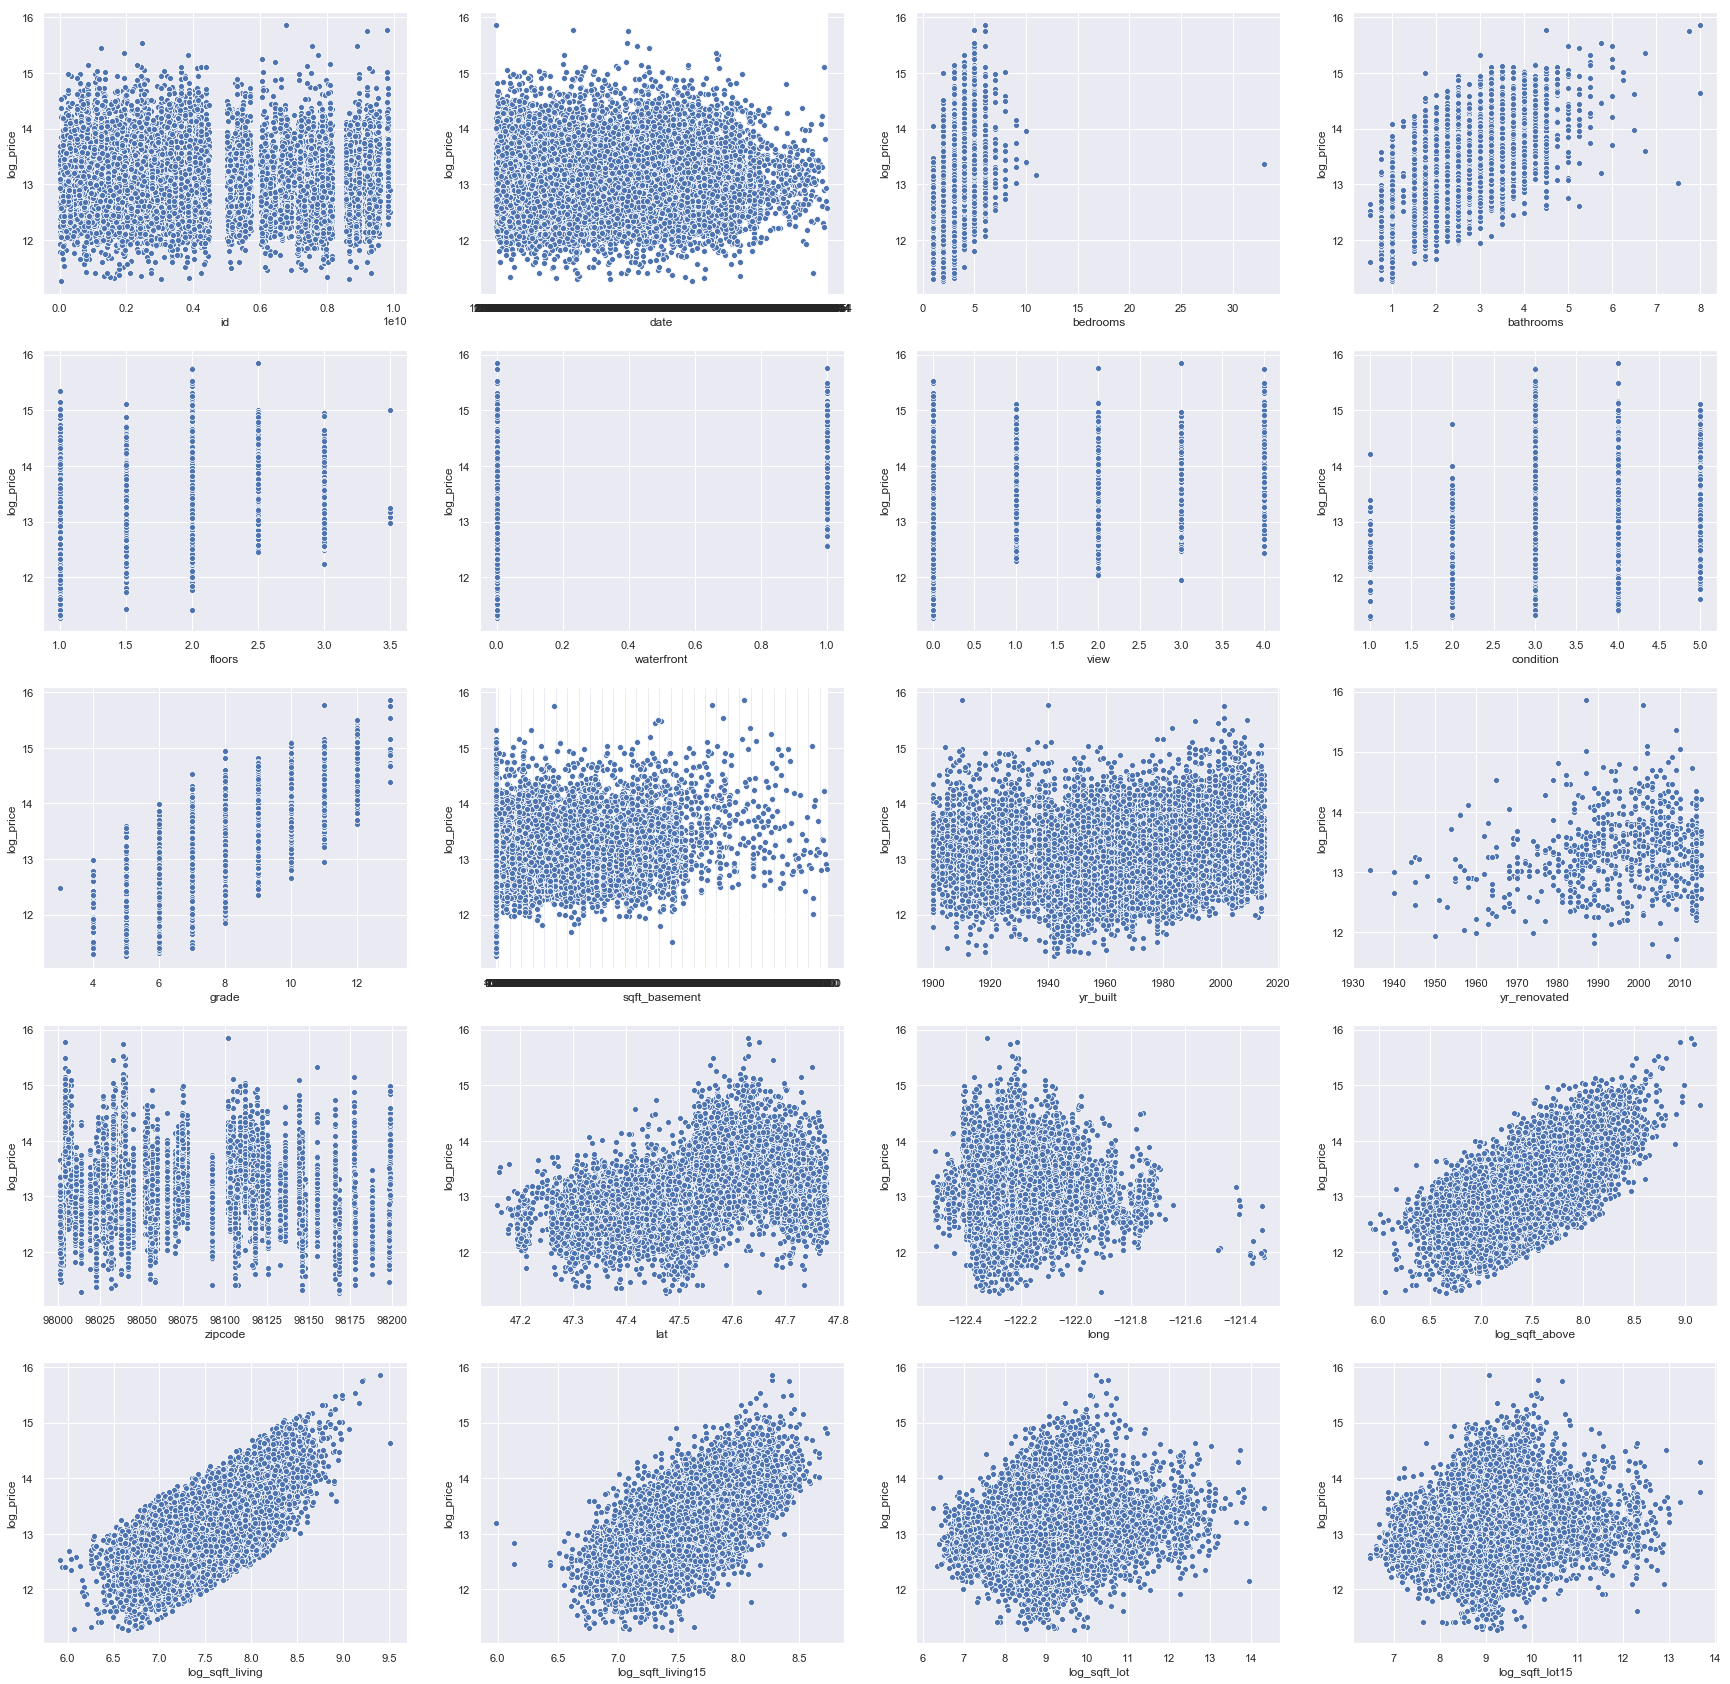

In [17]:
#identify outliers by looking at each indep var vs dep
f.scatter_one_vs_all(df,'log_price')

In [18]:
# chhose bedroom and bathrooms to elim outliers
outliers = ['bedrooms', 'bathrooms','long']
df = f.remove_outliers(df, outliers)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                   21597 non-null int64
date                 21597 non-null object
bedrooms             21067 non-null float64
bathrooms            21036 non-null float64
floors               21597 non-null float64
waterfront           21597 non-null float64
view                 21597 non-null float64
condition            21597 non-null int64
grade                21597 non-null int64
sqft_basement        21143 non-null object
yr_built             21597 non-null int64
yr_renovated         744 non-null float64
zipcode              21597 non-null int64
lat                  21597 non-null float64
long                 21342 non-null float64
log_price            21597 non-null float64
log_sqft_above       21597 non-null float64
log_sqft_living      21597 non-null float64
log_sqft_living15    21597 non-null float64
log_sqft_lot         21597 non-null float64
log_sqft_lot15       2159

0

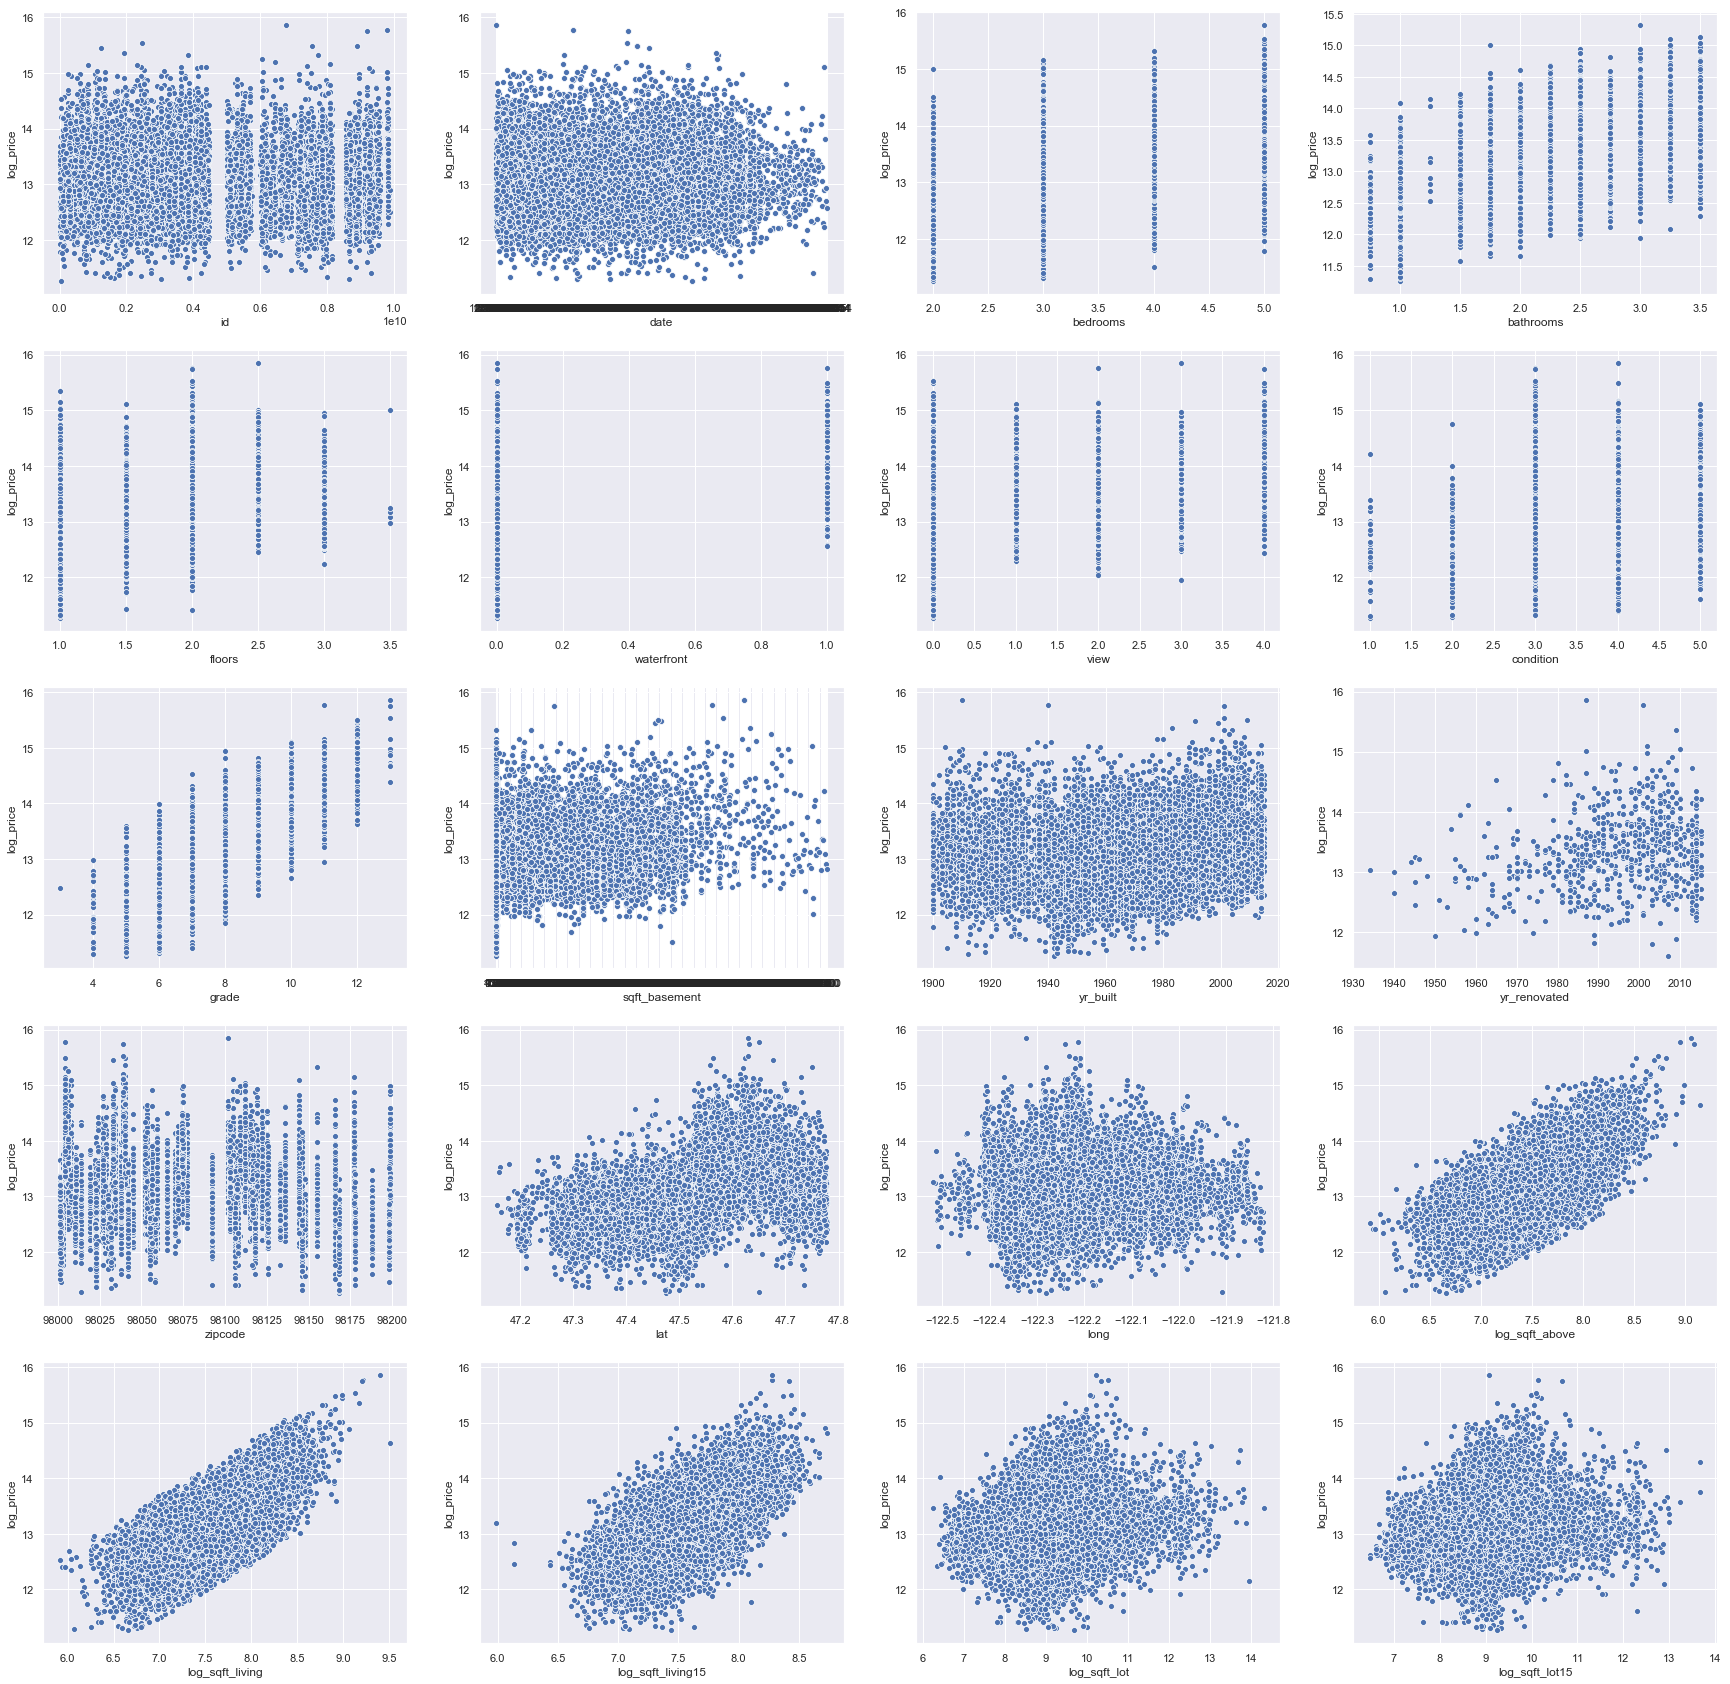

In [20]:
f.scatter_one_vs_all(df,'log_price')

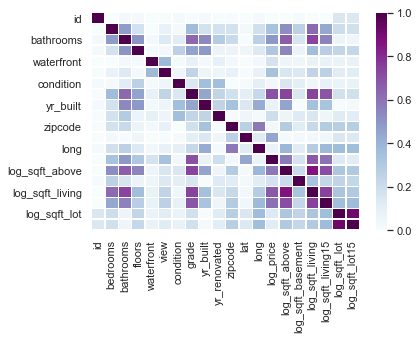

In [21]:
#check for colinearity
sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidths=.5)

In [22]:
df.corr()[abs(df.corr()>.75)]

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,log_price,log_sqft_above,log_sqft_basement,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


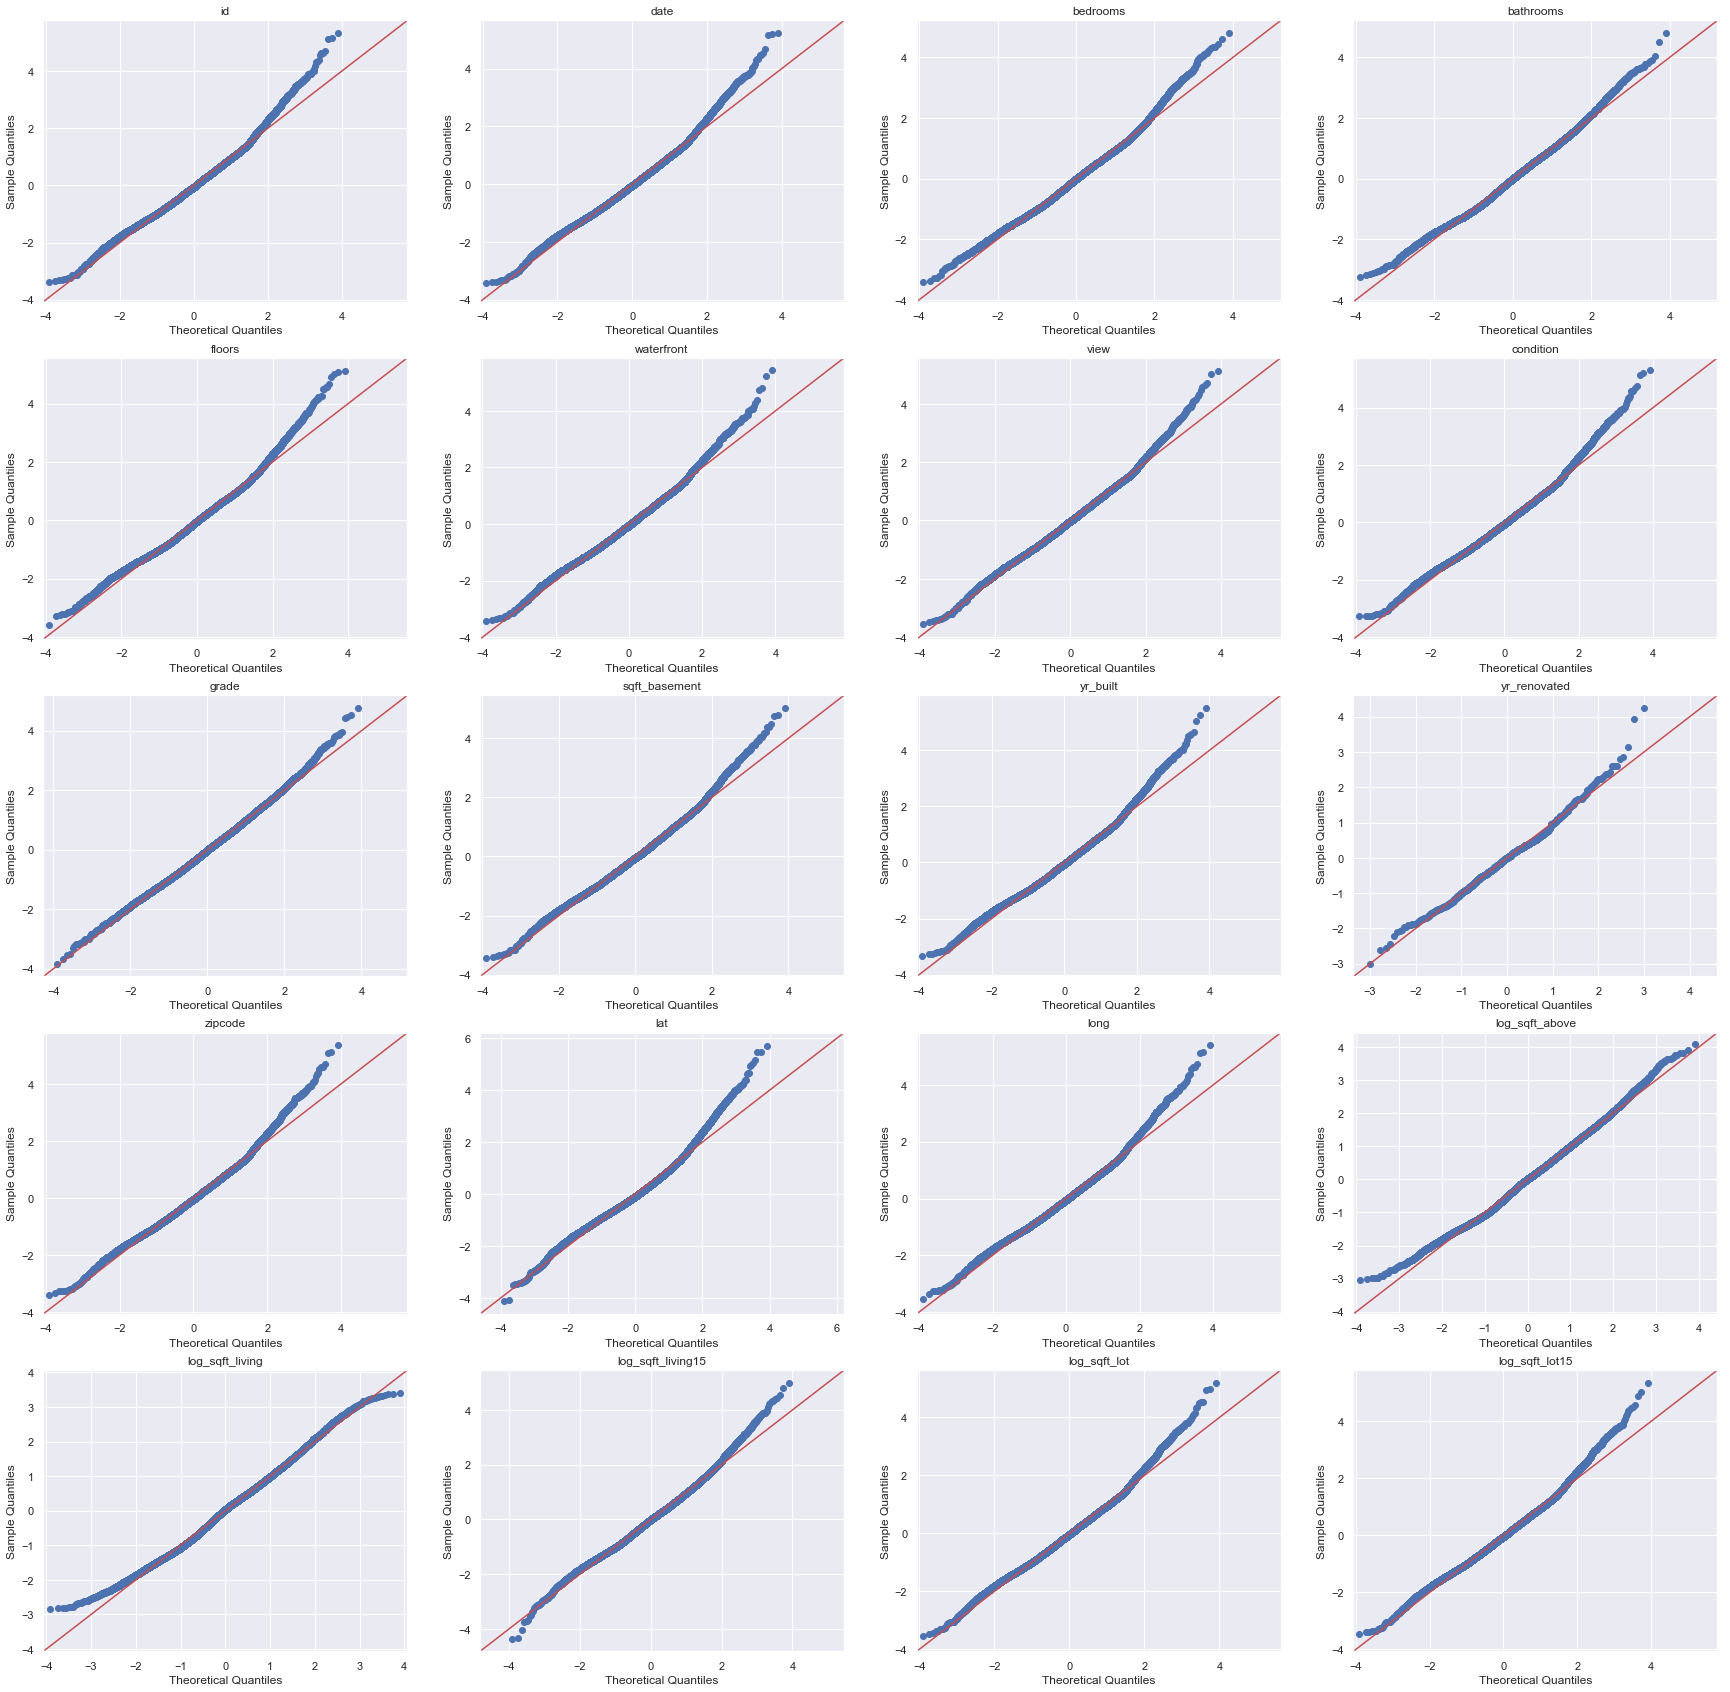

In [22]:
f.qq_plot('log_price', df)

TypeError: plot_partregress() missing 1 required positional argument: 'exog_others'

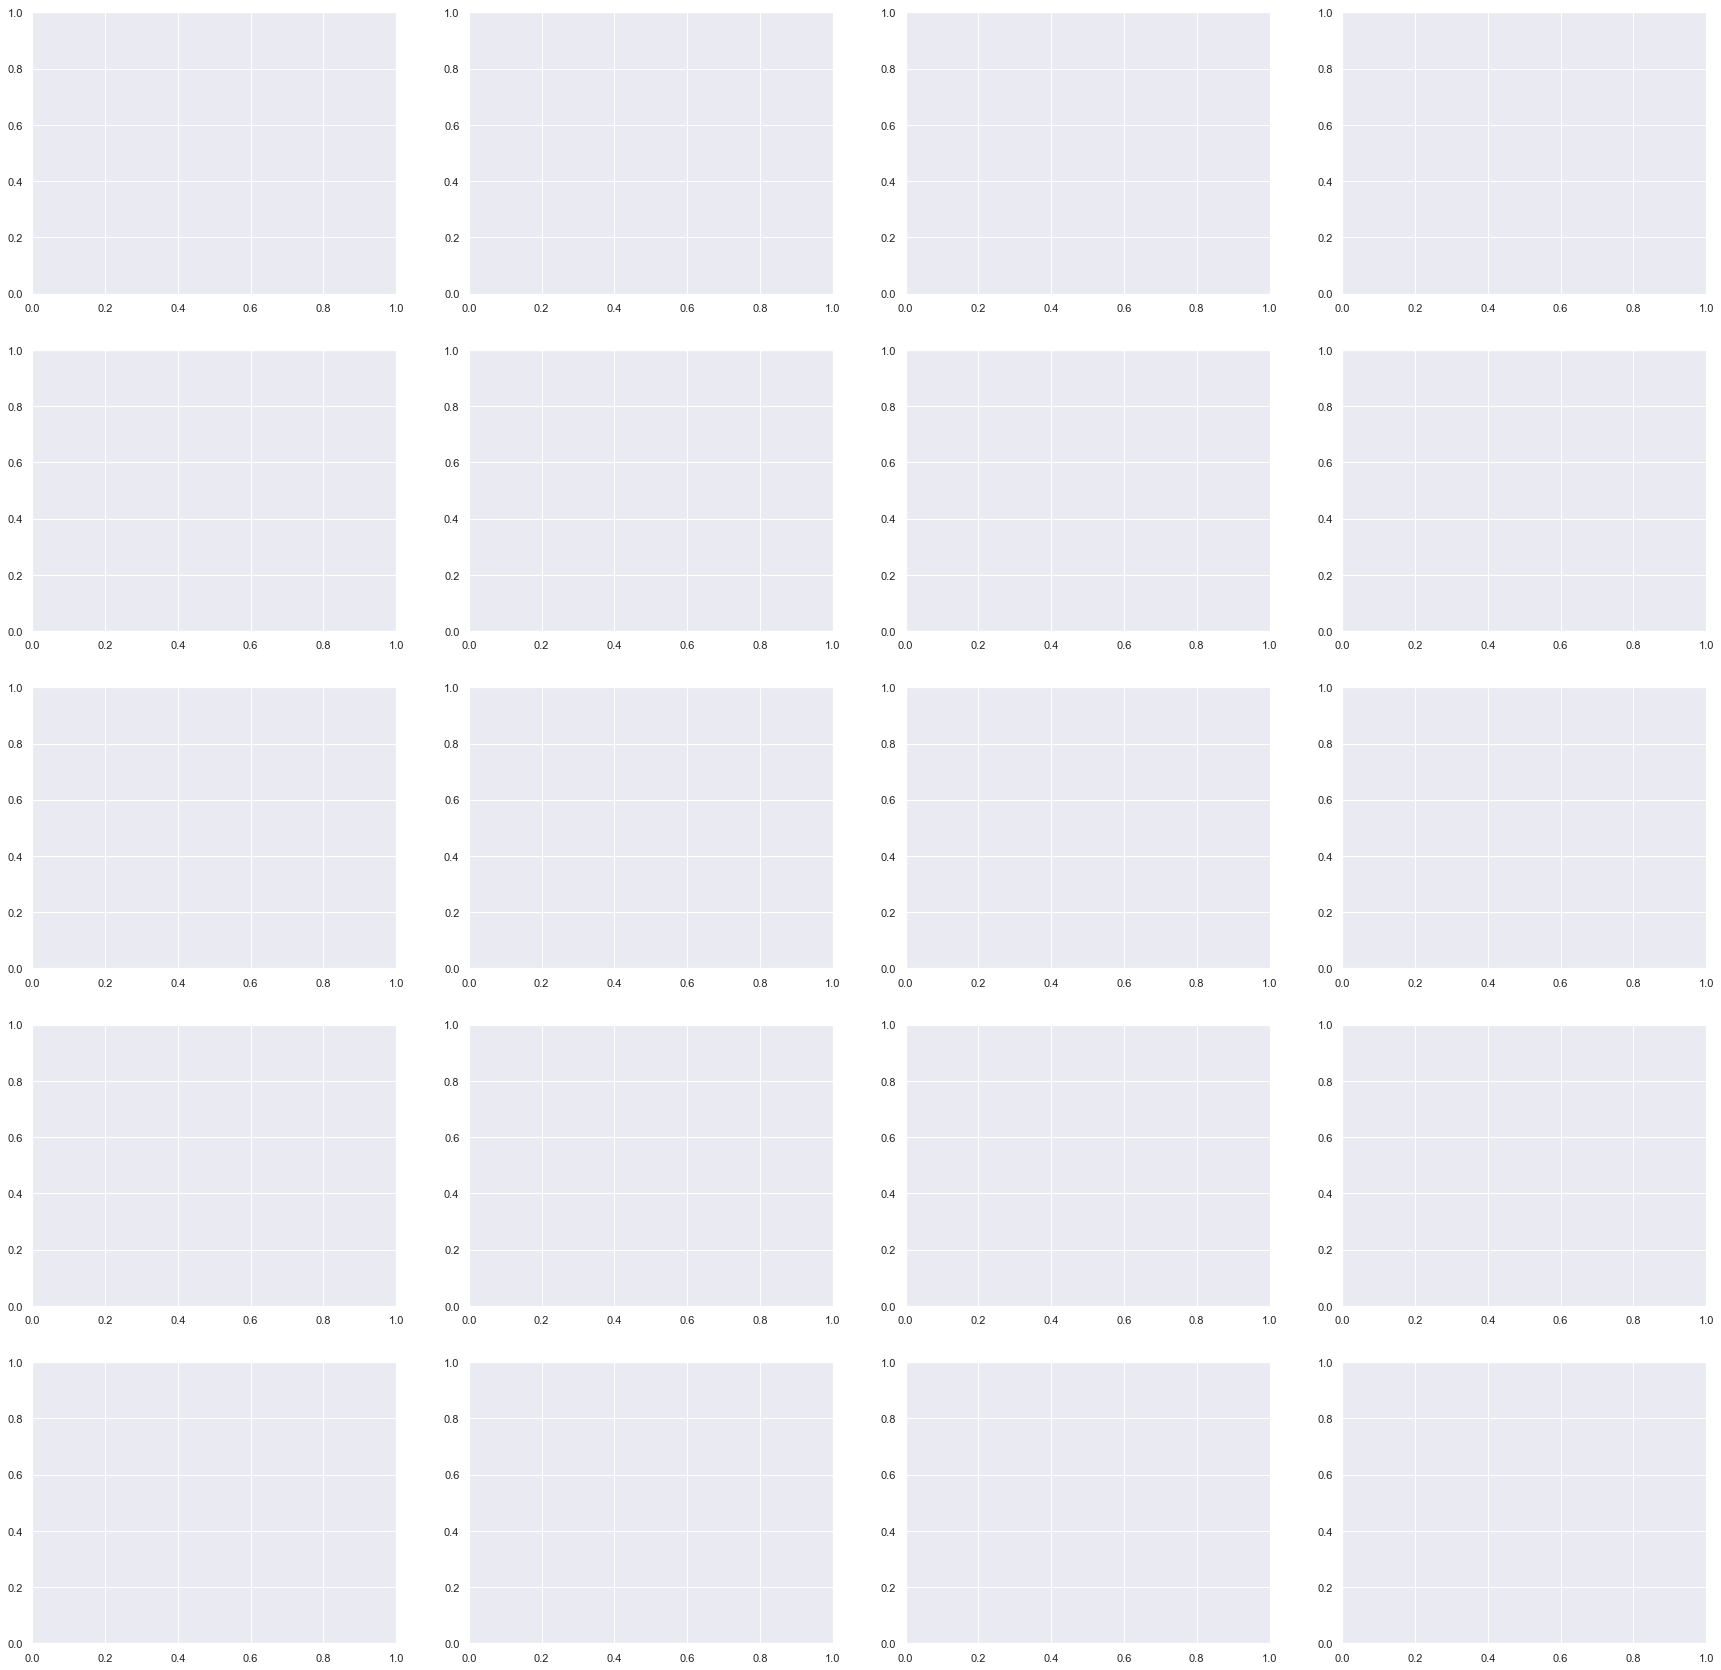

In [24]:
f.partial_regress('log_price', df)

In [23]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'log_price', 'log_sqft_above',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15'],
      dtype='object')

In [150]:
def replace_null_w_median(list_columns):
    
    for col in list_columns:
        if col in df.columns: 
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].replace(0.0, np.nan)
            df[col] = df[col].fillna(df[col].median()) 
                   
        else: 
            return print('inputted columns not in dataframe-- try again')
        
        
        return 

In [151]:
replace_null_w_median(['bedrooms', 'bathrooms', 'view'])

In [155]:
df.isna().sum()

id                       0
date                     0
bedrooms                 0
bathrooms                0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
yr_built                 0
yr_renovated         20853
zipcode                  0
lat                      0
long                   255
log_price                0
log_sqft_above           0
log_sqft_basement        0
log_sqft_living          0
log_sqft_living15        0
log_sqft_lot             0
log_sqft_lot15           0
dtype: int64

In [ ]:
'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'log_sqft_above', 'log_sqft_basement',
       'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot',
       'log_sqft_lot15'])

In [157]:
predictors = df.reindex(columns=['bedrooms', 'bathrooms', 'view'])

In [159]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
bedrooms     21597 non-null float64
bathrooms    21597 non-null float64
view         21597 non-null float64
dtypes: float64(3)
memory usage: 506.3 KB


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                   21597 non-null int64
date                 21597 non-null object
bedrooms             21597 non-null float64
bathrooms            21597 non-null float64
floors               21597 non-null float64
waterfront           21597 non-null float64
view                 21597 non-null float64
condition            21597 non-null int64
grade                21597 non-null int64
yr_built             21597 non-null int64
yr_renovated         744 non-null float64
zipcode              21597 non-null int64
lat                  21597 non-null float64
long                 21342 non-null float64
log_price            21597 non-null float64
log_sqft_above       21597 non-null float64
log_sqft_basement    21597 non-null float64
log_sqft_living      21597 non-null float64
log_sqft_living15    21597 non-null float64
log_sqft_lot         21597 non-null float64
log_sqft_lot15       215

In [19]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression



#replace_null_w_median(['bedrooms', 'bathrooms', 'view'])





def test_predictors(list_of_features):


    predictors = df.reindex(columns=list_of_features)

    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = 2)
    selector = selector.fit(predictors, df['log_price'])

    selector_list = selector.support_
    answer_list = []
    
    for i in range(0,len(selector_list)):
         answer_list.append(f'{list_of_features[i]} - {selector_list[i]}')
    
    
    return answer_list

In [20]:
test_predictors(['bedrooms', 'bathrooms', 'view'])

['bedrooms - False', 'bathrooms - True', 'view - True']

In [28]:
def replace_null_w_median(list_columns, df):
    df_copy = df.copy()
    for col in list_columns:
        if col in df.columns: 
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].replace(0.0, np.nan)
            df[col] = df[col].fillna(df[col].median())   
                   
        else: 
            return print('inputted columns not in dataframe-- try again')
        
        
        return df

In [21]:
df = replace_null_w_median(['sqft_basement', 'yr_renovated'], df)

NameError: name 'replace_null_w_median' is not defined

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                   21597 non-null int64
date                 21597 non-null object
bedrooms             21597 non-null int64
bathrooms            21597 non-null float64
floors               21597 non-null float64
waterfront           21597 non-null float64
view                 21597 non-null float64
condition            21597 non-null int64
grade                21597 non-null int64
sqft_basement        21143 non-null object
yr_built             21597 non-null int64
yr_renovated         744 non-null float64
zipcode              21597 non-null int64
lat                  21597 non-null float64
long                 21597 non-null float64
log_price            21597 non-null float64
log_sqft_above       21597 non-null float64
log_sqft_living      21597 non-null float64
log_sqft_living15    21597 non-null float64
log_sqft_lot         21597 non-null float64
log_sqft_lot15       21597 

In [52]:
df.sqft_basement.value_counts().loc['?'] / len(df) * 100

2.1021438162707784

In [60]:
df['sqft_basement'] = df['sqft_basement'].replace('?', 0.0)

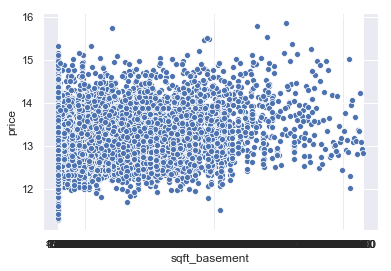

In [63]:
import sns.scatterplot(df.sqft_basement, np.log(df.price))

In [69]:
import statsmodels.formula.api as smf


In [24]:
df.head()

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,...,yr_renovated,zipcode,lat,long,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,10/13/2014,3,1.00,1.0,0.0,0.0,3,7,0.0,...,NaN,98178,47.5112,-122.257,12.309982,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,12/9/2014,3,2.25,2.0,0.0,0.0,3,7,400.0,...,1991.0,98125,47.7210,-122.319,13.195614,7.682482,7.851661,7.432484,8.887653,8.941022
2,5631500400,2/25/2015,2,1.00,1.0,0.0,0.0,3,6,0.0,...,NaN,98028,47.7379,-122.233,12.100712,6.646391,6.646391,7.908387,9.210340,8.994917
3,2487200875,12/9/2014,4,3.00,1.0,0.0,0.0,5,7,910.0,...,NaN,98136,47.5208,-122.393,13.311329,6.956545,7.580700,7.215240,8.517193,8.517193
4,1954400510,2/18/2015,3,2.00,1.0,0.0,0.0,3,8,0.0,...,NaN,98074,47.6168,-122.045,13.142166,7.426549,7.426549,7.495542,8.997147,8.923058


In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
def get_statistics(features, depend, df):
    '''put in list of cols in df or all cols and 
    depend var will return test stas for each var'''
    df_copy = df.copy()
    features_dict = {} #list to store stats by feature 
    features = list(features)
    if depend in features:
        features.remove(depend) #remove depend var
    for feature in features:
        f = '{}~{}'.format(depend, feature)
        model = ols(formula=f, data=df_copy).fit()
        feature_dict = {'r_squared': model.rsquared, 'pvalue' : model.pvalues[1]}
        features_dict.update({feature :feature_dict})
    return features_dict

In [54]:
x = get_statistics(df.columns, 'log_price', df)


In [55]:
x

{'id': {'r_squared': 1.4069217304180093e-05, 'pvalue': 0.5814975684189505},
 'date': {'r_squared': 0.022167068943267254, 'pvalue': 0.41321136550497484},
 'bedrooms': {'r_squared': 0.11579533856997204, 'pvalue': 0.0},
 'bathrooms': {'r_squared': 0.2447444881248494, 'pvalue': 0.0},
 'floors': {'r_squared': 0.09649098896318598, 'pvalue': 0.0},
 'waterfront': {'r_squared': 0.029145322638965854,
  'pvalue': 6.303414395929992e-141},
 'view': {'r_squared': 0.11878551344138022, 'pvalue': 0.0},
 'condition': {'r_squared': 0.0015146300738438923,
  'pvalue': 1.0575553096298548e-08},
 'grade': {'r_squared': 0.4952223953087438, 'pvalue': 0.0},
 'sqft_basement': {'r_squared': 0.12583236099805273,
  'pvalue': 0.021816940491879204},
 'yr_built': {'r_squared': 0.006493663991191001,
  'pvalue': 1.885763511733736e-32},
 'yr_renovated': {'r_squared': 0.03882908909741667,
  'pvalue': 5.992823454069289e-08},
 'zipcode': {'r_squared': 0.0015044846645606569,
  'pvalue': 1.1839435196598725e-08},
 'lat': {'r_sq

In [41]:
{'r_square': model.rsquared, 'pvalue' : model.pvalues[1]} #rsq,pvalue

{'r_square': 0.4553572758489989, 'pvalue': 0.0}

In [50]:
{}.get()

TypeError: get expected at least 1 arguments, got 0